# Cadena de Gimnasio

### Carga de Bibliotecas Necesarias

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

## Carga de datos y gráfica de tabla

In [11]:
df = pd.read_excel("C:\\Users\\Lucas\\OneDrive\\Beltrán\\CDeIA\\Cuarto_Cuatrimestre\\Mineria de Datos\\TP2_Guía_AA\\Mini_Proyecto_Clientes_Promociones.xlsx")

print(df.head())

df['Genero'] = df['Genero'].map({'F':0,'M':1})
df['Recibio_Promo'] = df['Recibio_Promo'].map({'Si':1, 'No':0})
df['Recompra'] = df['Recompra'].map({'Si':1, 'No':0})

   Cliente_ID Genero  Edad Recibio_Promo  Monto_Promo Recompra  Total_Compras  \
0           1      F    23            Si          500       Si              2   
1           2      M    45            Si          500       Si              2   
2           3      F    60            No          700       No              3   
3           4      M    22            Si          800       No              1   
4           5      M    32            Si          300       Si              2   

   Ingreso_Mensual  
0            30000  
1            40000  
2            60000  
3            30000  
4            50000  


## Gráfico de barras corregido

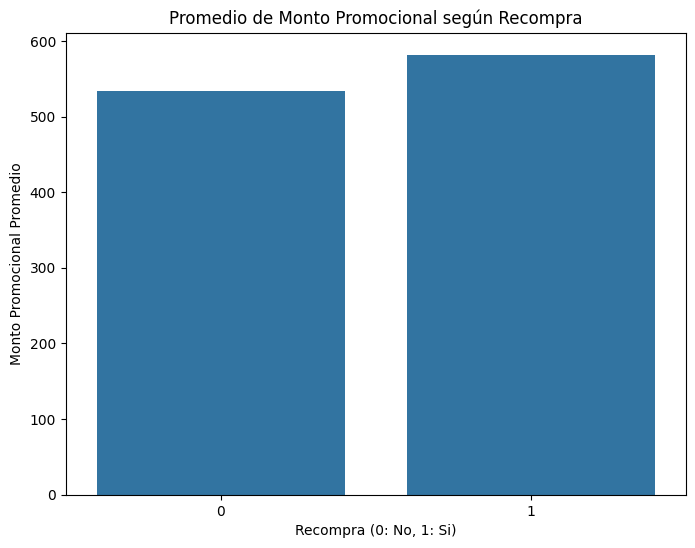

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Recompra", y="Monto_Promo", data=df, estimator='mean', errorbar=None)
plt.title("Promedio de Monto Promocional según Recompra")
plt.xlabel("Recompra (0: No, 1: Si)")
plt.ylabel("Monto Promocional Promedio")
plt.show()

## Modelado Predictivo

In [13]:
X = df.drop(['Cliente_ID','Recompra'], axis=1)
y = df['Recompra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Gráfico del árbol de decisión

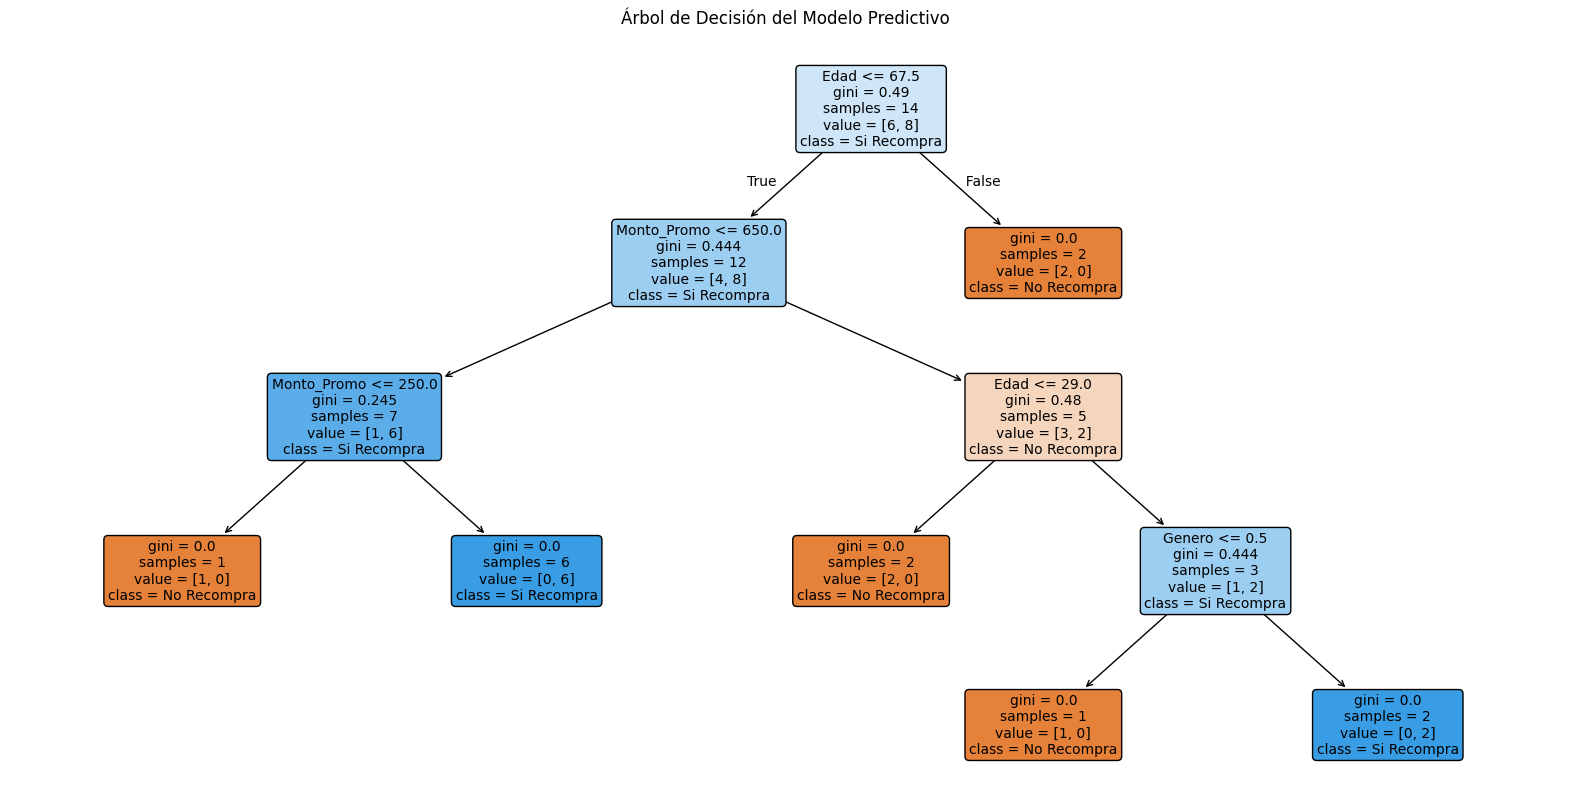

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(modelo, 
          feature_names=X.columns,
          class_names=['No Recompra', 'Si Recompra'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión del Modelo Predictivo")
plt.show()

y_pred = modelo.predict(X_test)

## Matriz de confusión

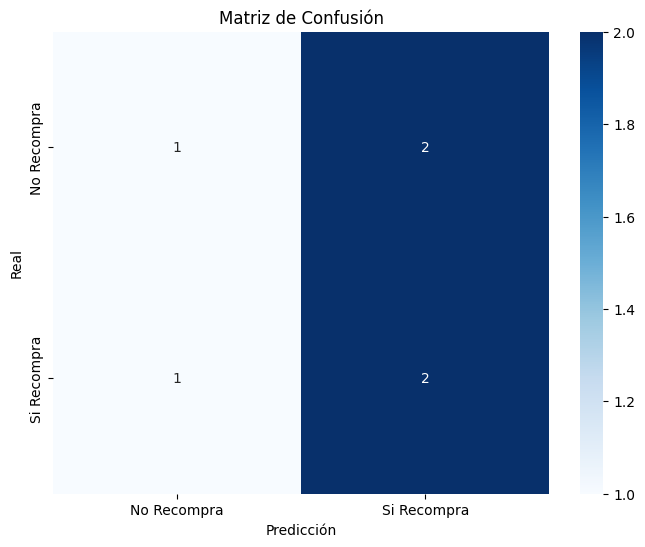

[[1 2]
 [1 2]]


In [15]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Recompra', 'Si Recompra'],
            yticklabels=['No Recompra', 'Si Recompra'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print(confusion_matrix(y_test, y_pred))

## Reporte del modelo

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

